In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función perceptrón básica
def perceptron(x1, x2, w1, w2, bias):
    return 1 if (w1*x1 + w2*x2 + bias) >= 0 else 0

# Función para visualizar el perceptrón
def graficar_perceptron(w1, w2, bias, datos, resultados_esperados, titulo):
    plt.figure(figsize=(8, 6))

    # Graficar puntos
    for i, (x1, x2) in enumerate(datos):
        color = 'red' if resultados_esperados[i] == 0 else 'blue'
        marker = 'o' if resultados_esperados[i] == 0 else 's'
        plt.scatter(x1, x2, c=color, s=200, marker=marker,
                   edgecolor='black', linewidth=2)
        plt.text(x1+0.05, x2+0.05, f'({x1},{x2})', fontsize=12)

    # Graficar línea de separación: w1*x1 + w2*x2 + bias = 0
    if w2 != 0:  # Para evitar división por cero
        x_line = np.linspace(-0.5, 1.5, 100)
        y_line = -(w1*x_line + bias) / w2
        plt.plot(x_line, y_line, 'green', linewidth=3, alpha=0.8,
                label=f'Línea: {w1:.1f}x₁ + {w2:.1f}x₂ + {bias:.1f} = 0')

    plt.xlim(-0.3, 1.3)
    plt.ylim(-0.3, 1.3)
    plt.xlabel('x1', fontsize=14)
    plt.ylabel('x2', fontsize=14)
    plt.title(titulo, fontsize=16)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"🔍 Interpretación: Los puntos ROJOS (○) son clase 0, los AZULES (■) son clase 1")
    print(f"   La línea VERDE separa las clases. ¿Lo logra perfectamente?")
    print(f"💡 Recordá: Un perceptrón es la ecuación de una línea: y = w₁x₁ + w₂x₂ + b")

# Datos para lógica booleana
datos = np.array([[0,0], [0,1], [1,0], [1,1]])
print("🧠 Vamos a entrenar un perceptrón para lógica booleana")
print("   (¡Y ver cómo funciona visualmente!)")

🧠 Vamos a entrenar un perceptrón para lógica booleana
   (¡Y ver cómo funciona visualmente!)



1️⃣ PROBLEMA AND: Solo verdadero cuando AMBAS entradas son 1
x1 | x2 | AND esperado
 0 |  0 |      0
 0 |  1 |      0
 1 |  0 |      0
 1 |  1 |      1

Probando AND con pesos: w1=0.5, w2=0.5, bias=-0.7
  0,0 → 0 (esperado 0) ✅
  0,1 → 0 (esperado 0) ✅
  1,0 → 0 (esperado 0) ✅
  1,1 → 1 (esperado 1) ✅


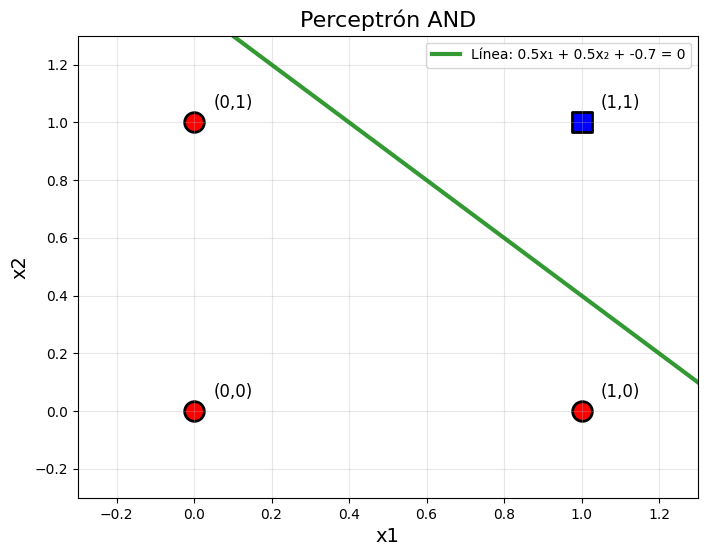

🔍 Interpretación: Los puntos ROJOS (○) son clase 0, los AZULES (■) son clase 1
   La línea VERDE separa las clases. ¿Lo logra perfectamente?
💡 Recordá: Un perceptrón es la ecuación de una línea: y = w₁x₁ + w₂x₂ + b


In [ ]:
# === LÓGICA AND ===
print("\n1️⃣ PROBLEMA AND: Solo verdadero cuando AMBAS entradas son 1")
print("x1 | x2 | AND esperado")
print(" 0 |  0 |      0")
print(" 0 |  1 |      0")
print(" 1 |  0 |      0")
print(" 1 |  1 |      1")  # estudiantes completan

# Encontremos pesos que funcionen para AND
w1, w2, bias = 0.5, 0.5, -0.7  # pesos iguales, ¿qué bias?

print(f"\nProbando AND con pesos: w1={w1}, w2={w2}, bias={bias}")
resultados_and = [0, 0, 0, 1]

for i, (x1, x2) in enumerate(datos):
    prediccion = perceptron(x1, x2, w1, w2, bias)
    esperado = resultados_and[i]
    ok = "✅" if prediccion == esperado else "❌"
    print(f"  {x1},{x2} → {prediccion} (esperado {esperado}) {ok}")

# 📊 VISUALIZACIÓN AND
graficar_perceptron(w1, w2, bias, datos, resultados_and, "Perceptrón AND")

In [ ]:
# === LÓGICA OR ===
print("\n2️⃣ PROBLEMA OR: Verdadero cuando AL MENOS UNA entrada es 1")
print("x1 | x2 | OR esperado")
print(" 0 |  0 |      0")
print(" 0 |  1 |      1")
print(" 1 |  0 |      1")
print(" 1 |  1 |      1")

# Para OR necesitamos ser más permisivos
w1, w2, bias = 0.5, 0.5, -0.2  # ¿qué bias permite que una sola entrada active?

print(f"\nProbando OR con pesos: w1={w1}, w2={w2}, bias={bias}")
resultados_or = [0, 1, 1, 1]

for i, (x1, x2) in enumerate(datos):
    prediccion = perceptron(x1, x2, w1, w2, bias)
    esperado = resultados_or[i]
    ok = "✅" if prediccion == esperado else "❌"
    print(f"  {x1},{x2} → {prediccion} (esperado {esperado}) {ok}")


2️⃣ PROBLEMA OR: Verdadero cuando AL MENOS UNA entrada es 1
x1 | x2 | OR esperado
 0 |  0 |      0
 0 |  1 |      1
 1 |  0 |      1
 1 |  1 |      1

Probando OR con pesos: w1=0.5, w2=0.5, bias=-0.2
  0,0 → 0 (esperado 0) ✅
  0,1 → 1 (esperado 1) ✅
  1,0 → 1 (esperado 1) ✅
  1,1 → 1 (esperado 1) ✅



3️⃣ PROBLEMA NOT: Inversor simple
x | NOT esperado
0 |      1
1 |      0

Probando NOT con peso: w1=-1, bias=0.5
  0 → 1 (esperado 1) ✅
  1 → 0 (esperado 0) ✅
🎉 ¡NOT también funciona! El perceptrón es genial...


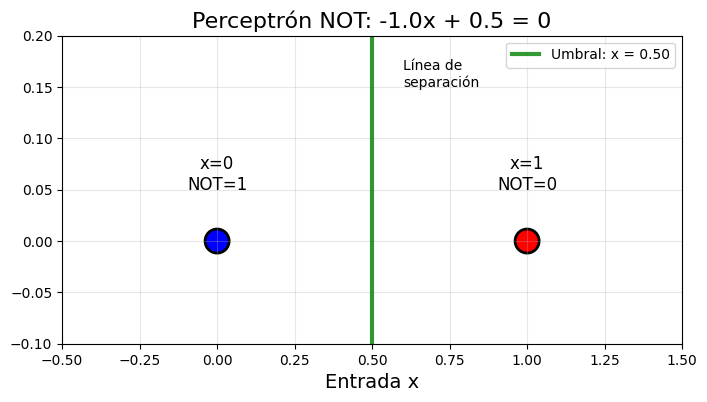

🔍 El umbral está en x = 0.50
   Si x < 0.50 → salida 1 (azul)
   Si x > 0.50 → salida 0 (rojo)


In [ ]:
# === LÓGICA NOT (1 entrada) ===
print("\n3️⃣ PROBLEMA NOT: Inversor simple")
datos_not = np.array([[0], [1]])
print("x | NOT esperado")
print("0 |      1")
print("1 |      0")

# Para NOT: cuando x=0 → salida=1, cuando x=1 → salida=0
w1, bias = -1, 0.5  # peso negativo + bias positivo

print(f"\nProbando NOT con peso: w1={w1}, bias={bias}")
resultados_not = [1, 0]

for i, x in enumerate([0, 1]):
    prediccion = 1 if (w1*x + bias) >= 0 else 0
    esperado = resultados_not[i]
    ok = "✅" if prediccion == esperado else "❌"
    print(f"  {x} → {prediccion} (esperado {esperado}) {ok}")

print("🎉 ¡NOT también funciona! El perceptrón es genial...")

# 📊 VISUALIZACIÓN NOT (1D)
def graficar_not(w1, bias):
    plt.figure(figsize=(8, 4))

    # Puntos NOT
    puntos_x = [0, 1]
    puntos_y = [1, 0]  # NOT: 0→1, 1→0
    colores = ['blue', 'red']  # 1→azul, 0→rojo

    plt.scatter(puntos_x, [0, 0], c=colores, s=300, edgecolor='black', linewidth=2)
    for i, (x, y) in enumerate(zip(puntos_x, puntos_y)):
        plt.text(x, 0.05, f'x={x}\nNOT={y}', ha='center', fontsize=12)

    # Línea de decisión: w1*x + bias = 0 → x = -bias/w1
    umbral = -bias/w1 if w1 != 0 else 0
    plt.axvline(x=umbral, color='green', linewidth=3, alpha=0.8,
               label=f'Umbral: x = {umbral:.2f}')
    plt.text(umbral+0.1, 0.15, f'Línea de\nseparación', fontsize=10)

    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.1, 0.2)
    plt.xlabel('Entrada x', fontsize=14)
    plt.title(f'Perceptrón NOT: {w1:.1f}x + {bias:.1f} = 0', fontsize=16)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"🔍 El umbral está en x = {umbral:.2f}")
    print(f"   Si x < {umbral:.2f} → salida 1 (azul)")
    print(f"   Si x > {umbral:.2f} → salida 0 (rojo)")

graficar_not(w1, bias)


4️⃣ PROBLEMA XOR: Verdadero solo cuando las entradas son DIFERENTES
x1 | x2 | XOR esperado
 0 |  0 |      0
 0 |  1 |      1
 1 |  0 |      1
 1 |  1 |      0

🤔 Intentemos resolver XOR...

  Intento 1: w1=1, w2=1, bias=-0.5
    0,0 → 0 (esperado 0) ✅
    0,1 → 1 (esperado 1) ✅
    1,0 → 1 (esperado 1) ✅
    1,1 → 1 (esperado 0) ❌
    Aciertos: 3/4 (75%)

  Intento 2: w1=1, w2=1, bias=-1.5
    0,0 → 0 (esperado 0) ✅
    0,1 → 0 (esperado 1) ❌
    1,0 → 0 (esperado 1) ❌
    1,1 → 1 (esperado 0) ❌
    Aciertos: 1/4 (25%)

  Intento 3: w1=0.5, w2=0.5, bias=-0.1
    0,0 → 0 (esperado 0) ✅
    0,1 → 1 (esperado 1) ✅
    1,0 → 1 (esperado 1) ✅
    1,1 → 1 (esperado 0) ❌
    Aciertos: 3/4 (75%)

  Intento 4: w1=1, w2=-1, bias=0.5
    0,0 → 1 (esperado 0) ❌
    0,1 → 0 (esperado 1) ❌
    1,0 → 1 (esperado 1) ✅
    1,1 → 1 (esperado 0) ❌
    Aciertos: 1/4 (25%)

💥 RESULTADO: ¡Ningún perceptrón simple puede resolver XOR!
   Mejor intento: 3/4 = 75%
   🤯 ¡Necesitamos algo más poderoso!


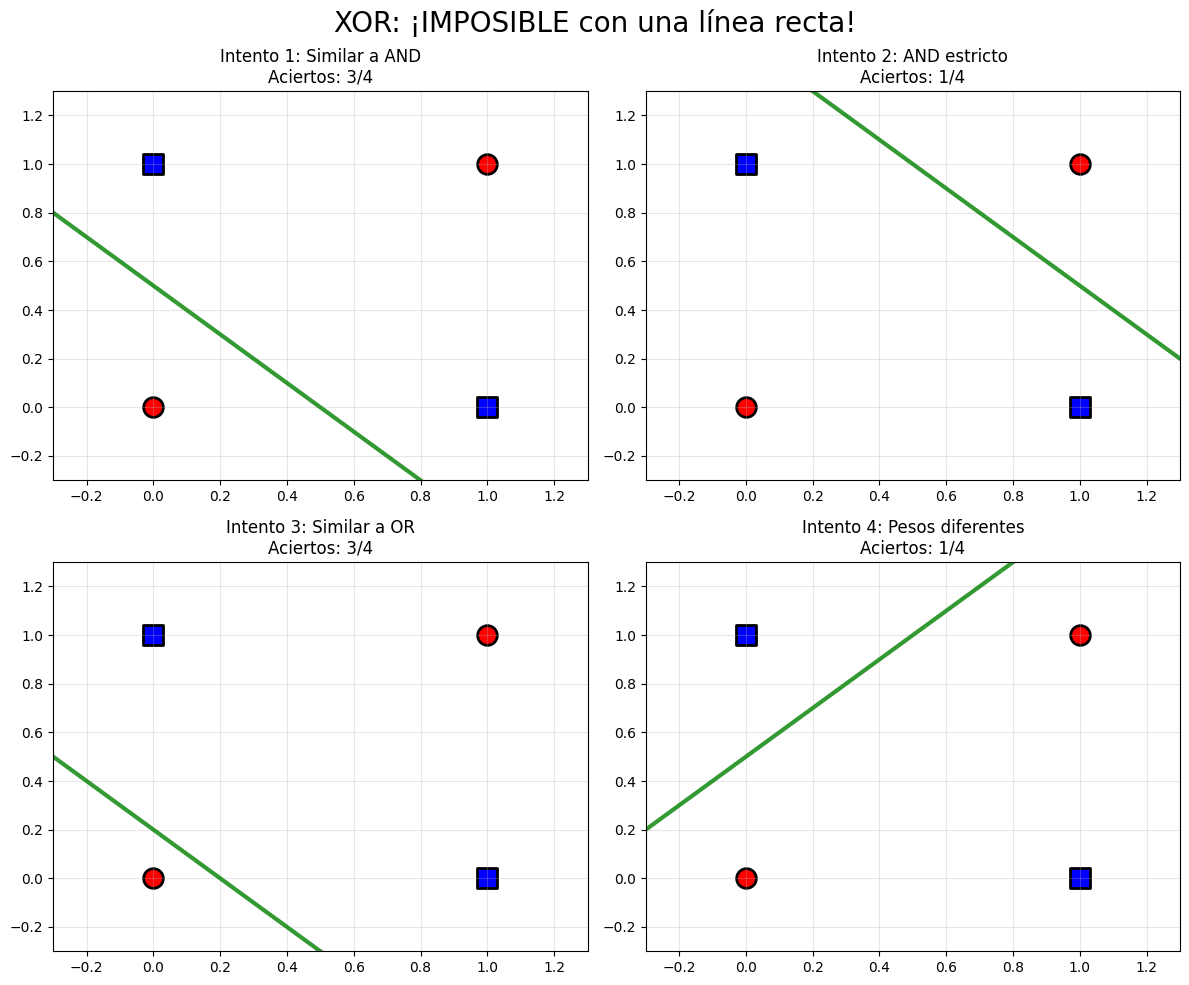

🔍 ANÁLISIS VISUAL:
   🔵■ Puntos azules (cuadrados) deben estar de UN lado de la línea
   🔴○ Puntos rojos (círculos) deben estar del OTRO lado
   💥 ¡Es IMPOSIBLE dibujar una línea recta que los separe perfectamente!
   🧠 Por eso necesitamos REDES MULTICAPA (más de una línea)


In [ ]:
# === EL PROBLEMA XOR ===
print("\n4️⃣ PROBLEMA XOR: Verdadero solo cuando las entradas son DIFERENTES")
print("x1 | x2 | XOR esperado")
print(" 0 |  0 |      0")
print(" 0 |  1 |      1")
print(" 1 |  0 |      1")
print(" 1 |  1 |      0")

resultados_xor = [0, 1, 1, 0]

# Intentemos varios pesos para XOR
print("\n🤔 Intentemos resolver XOR...")
intentos = [
    (1, 1, -0.5),   # Similar a AND
    (1, 1, -1.5),   # AND más estricto
    (0.5, 0.5, -0.1),  # Similar a OR
    (1, -1, 0.5),   # Pesos diferentes
]

mejor_intento = 0
mejor_aciertos = 0

for j, (w1, w2, bias) in enumerate(intentos):
    print(f"\n  Intento {j+1}: w1={w1}, w2={w2}, bias={bias}")
    aciertos = 0
    for i, (x1, x2) in enumerate(datos):
        prediccion = perceptron(x1, x2, w1, w2, bias)
        esperado = resultados_xor[i]
        if prediccion == esperado:
            aciertos += 1
        ok = "✅" if prediccion == esperado else "❌"
        print(f"    {x1},{x2} → {prediccion} (esperado {esperado}) {ok}")

    print(f"    Aciertos: {aciertos}/4 ({aciertos/4:.0%})")
    if aciertos > mejor_aciertos:
        mejor_aciertos = aciertos
        mejor_intento = j+1

print(f"\n💥 RESULTADO: ¡Ningún perceptrón simple puede resolver XOR!")
print(f"   Mejor intento: {mejor_aciertos}/4 = {mejor_aciertos/4:.0%}")
print(f"   🤯 ¡Necesitamos algo más poderoso!")

# 📊 VISUALIZACIÓN XOR - ¡El Problema!
def graficar_xor_imposible():
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('XOR: ¡IMPOSIBLE con una línea recta!', fontsize=20)

    resultados_xor = [0, 1, 1, 0]
    intentos = [
        (1, 1, -0.5, "Intento 1: Similar a AND"),
        (1, 1, -1.5, "Intento 2: AND estricto"),
        (0.5, 0.5, -0.1, "Intento 3: Similar a OR"),
        (1, -1, 0.5, "Intento 4: Pesos diferentes")
    ]

    for idx, (w1, w2, bias, titulo) in enumerate(intentos):
        ax = axes[idx//2, idx%2]

        # Puntos XOR
        for i, (x1, x2) in enumerate(datos):
            color = 'red' if resultados_xor[i] == 0 else 'blue'
            marker = 'o' if resultados_xor[i] == 0 else 's'
            ax.scatter(x1, x2, c=color, s=200, marker=marker,
                      edgecolor='black', linewidth=2)

        # Línea de separación
        if w2 != 0:
            x_line = np.linspace(-0.5, 1.5, 100)
            y_line = -(w1*x_line + bias) / w2
            ax.plot(x_line, y_line, 'green', linewidth=3, alpha=0.8)

        # Verificar predicciones
        aciertos = 0
        for i, (x1, x2) in enumerate(datos):
            pred = perceptron(x1, x2, w1, w2, bias)
            if pred == resultados_xor[i]:
                aciertos += 1

        ax.set_xlim(-0.3, 1.3)
        ax.set_ylim(-0.3, 1.3)
        ax.set_title(f'{titulo}\nAciertos: {aciertos}/4')
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("🔍 ANÁLISIS VISUAL:")
    print("   🔵■ Puntos azules (cuadrados) deben estar de UN lado de la línea")
    print("   🔴○ Puntos rojos (círculos) deben estar del OTRO lado")
    print("   💥 ¡Es IMPOSIBLE dibujar una línea recta que los separe perfectamente!")
    print("   🧠 Por eso necesitamos REDES MULTICAPA (más de una línea)")

graficar_xor_imposible()

In [ ]:
# === SETUP COMPLETO ===
from sklearn.neural_network import MLPClassifier

# Primero: resolver XOR que era imposible con perceptrón
X_xor = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor = np.array([0, 1, 1, 0])


hidden_sizes = (4,) # ¿cuántas neuronas ocultas?
# Crear MLP
mlp_xor = MLPClassifier(
    hidden_layer_sizes=hidden_sizes,
    activation='tanh',           # relu, logistic, tanh
    solver='adam',
    random_state=42,
    max_iter=2000
)

# Entrenar y evaluar
mlp_xor.fit(X_xor, y_xor)
y_pred_xor = mlp_xor.predict(X_xor)

print("🎯 MLP resuelve XOR:")
print("x1 | x2 | esperado | predicción | ✓")
for i in range(len(X_xor)):
    ok = "✓" if y_pred_xor[i] == y_xor[i] else "✗"
    print(f" {X_xor[i][0]} |  {X_xor[i][1]} |    {y_xor[i]}     |     {y_pred_xor[i]}      | {ok}")

print(f"Accuracy: {(y_pred_xor == y_xor).mean():.1%}")
print("💡 ¡La red multicapa SÍ puede resolver XOR!")

🎯 MLP resuelve XOR:
x1 | x2 | esperado | predicción | ✓
 0 |  0 |    0     |     0      | ✓
 0 |  1 |    1     |     1      | ✓
 1 |  0 |    1     |     1      | ✓
 1 |  1 |    0     |     0      | ✓
Accuracy: 100.0%
💡 ¡La red multicapa SÍ puede resolver XOR!


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


🎨 Visualizando arquitectura MLP para XOR:


/tmp/ipython-input-1493085317.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x_pos, y_pos), 0.3, color=color,
/tmp/ipython-input-1493085317.py:64: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


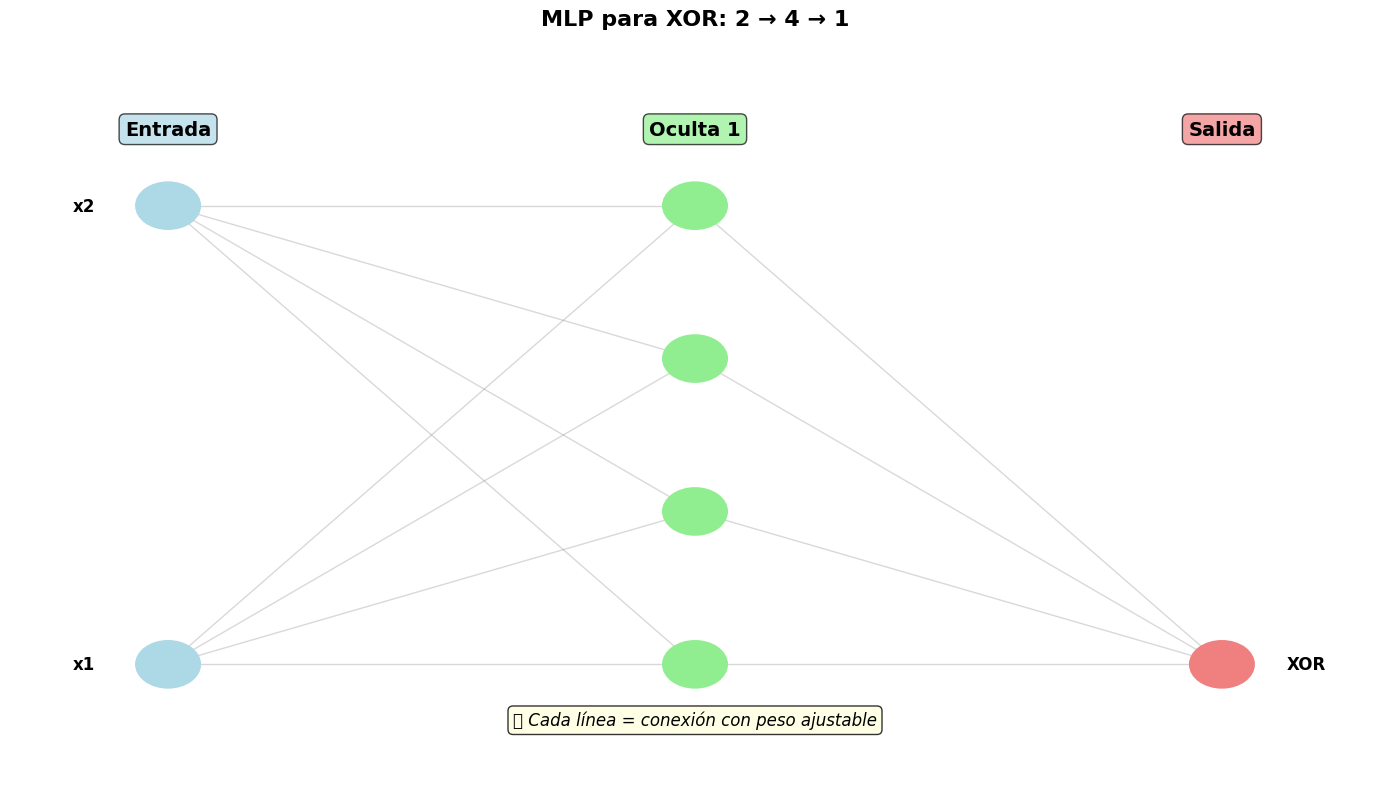

📊 Capa 1: 2 → 4 = 12 parámetros
📊 Capa 2: 4 → 1 = 5 parámetros
🎯 Total de parámetros: 17
🧠 ¿Por qué tantos parámetros? Cada conexión tiene un peso + bias por neurona


In [ ]:
# === VISUALIZACIÓN DE LA ARQUITECTURA ===
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, ConnectionPatch

def dibujar_red_neuronal(input_size, hidden_sizes, output_size, title="Red Neuronal MLP"):
    """
    Dibuja la arquitectura de una red neuronal multicapa
    """
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))

    # Configurar capas
    capas = [input_size] + list(hidden_sizes) + [output_size]
    nombres_capas = ['Entrada'] + [f'Oculta {i+1}' for i in range(len(hidden_sizes))] + ['Salida']
    colores_capas = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']

    # Espaciado
    x_positions = np.linspace(0, 10, len(capas))
    max_neurons = max(capas)

    # Dibujar neuronas por capa
    neuronas_pos = []
    for i, (x_pos, num_neurons, nombre, color) in enumerate(zip(x_positions, capas, nombres_capas, colores_capas)):
        y_positions = np.linspace(1, 7, num_neurons)
        capa_pos = []

        for j, y_pos in enumerate(y_positions):
            # Dibujar neurona
            circle = plt.Circle((x_pos, y_pos), 0.3, color=color,
                              edgecolor='black', linewidth=2, zorder=3)
            ax.add_patch(circle)

            # Etiquetas para entrada y salida
            if i == 0:  # Capa de entrada
                ax.text(x_pos-0.8, y_pos, f'x{j+1}' if j < 2 else f'x{j+1}',
                       fontsize=12, ha='center', va='center', weight='bold')
            elif i == len(capas)-1:  # Capa de salida
                ax.text(x_pos+0.8, y_pos, 'XOR', fontsize=12, ha='center', va='center', weight='bold')

            capa_pos.append((x_pos, y_pos))

        # Título de la capa
        ax.text(x_pos, 8, nombre, fontsize=14, ha='center', va='center',
               weight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.7))

        neuronas_pos.append(capa_pos)

    # Dibujar conexiones entre capas
    for i in range(len(neuronas_pos)-1):
        for pos1 in neuronas_pos[i]:
            for pos2 in neuronas_pos[i+1]:
                ax.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]],
                       'gray', alpha=0.3, linewidth=1, zorder=1)

    # Agregar información sobre pesos
    ax.text(5, 0.2, '💡 Cada línea = conexión con peso ajustable',
           fontsize=12, ha='center', style='italic',
           bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.8))

    ax.set_xlim(-1.5, 11.5)
    ax.set_ylim(-0.5, 9)
    ax.set_title(title, fontsize=16, weight='bold', pad=20)
    ax.axis('off')

    plt.tight_layout()
    plt.show()

    # Información adicional
    total_params = 0
    for i in range(len(capas)-1):
        params_capa = (capas[i] + 1) * capas[i+1]  # +1 por bias
        total_params += params_capa
        print(f"📊 Capa {i+1}: {capas[i]} → {capas[i+1]} = {params_capa:,} parámetros")

    print(f"🎯 Total de parámetros: {total_params:,}")
    print(f"🧠 ¿Por qué tantos parámetros? Cada conexión tiene un peso + bias por neurona")

# Visualizar la red MLP para XOR (asumiendo hidden_layer_sizes=(4,))
print("🎨 Visualizando arquitectura MLP para XOR:")
dibujar_red_neuronal(input_size=2, hidden_sizes=hidden_sizes, output_size=1,
                    title="MLP para XOR: 2 → 4 → 1")

/tmp/ipython-input-3084372246.py:70: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3084372246.py:70: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


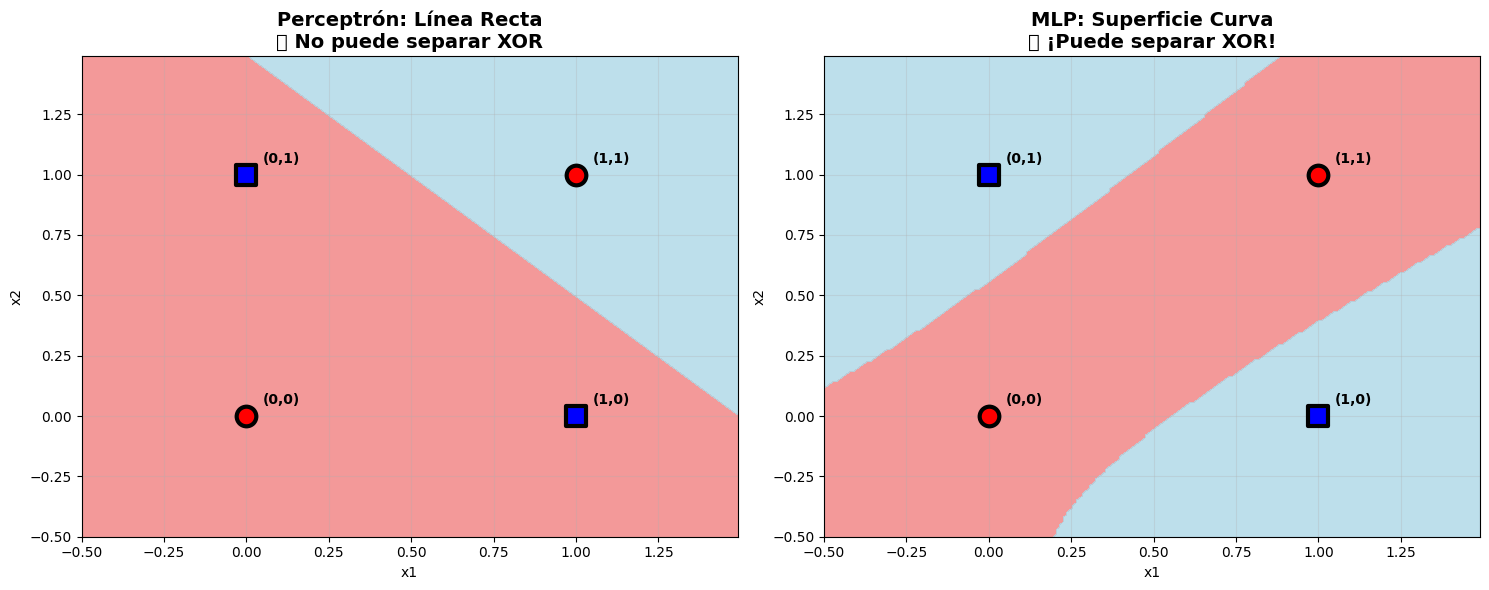

🔍 ANÁLISIS VISUAL:
   🔴 Zonas ROJAS = predicción 0 (clase 0)
   🔵 Zonas AZULES = predicción 1 (clase 1)
   📏 Perceptrón: Solo puede crear línea recta → falla en XOR
   🌊 MLP: Puede crear superficie curva → ¡resuelve XOR!


In [ ]:
# === SUPERFICIE DE DECISIÓN MLP vs PERCEPTRÓN ===
def comparar_superficies_decision(mlp_xor):
    """
    Compara cómo separa datos un perceptrón vs MLP
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Crear grid para superficie de decisión
    h = 0.01  # resolución del grid
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # === Subplot 1: Perceptrón (línea recta) ===
    ax1 = axes[0]

    # Intentar perceptrón para XOR (sabemos que fallará)
    def perceptron_xor(x1, x2):
        w1, w2, bias = 1, 1, -1.5  # Mejor intento
        return 1 if (w1*x1 + w2*x2 + bias) >= 0 else 0

    # Aplicar perceptrón al grid
    Z_perceptron = np.array([perceptron_xor(x1, x2) for x1, x2 in
                            zip(xx.ravel(), yy.ravel())])
    Z_perceptron = Z_perceptron.reshape(xx.shape)

    # Graficar superficie de decisión
    ax1.contourf(xx, yy, Z_perceptron, levels=1, alpha=0.8,
                colors=['lightcoral', 'lightblue'])

    # Puntos XOR
    colores_xor = ['red', 'blue', 'blue', 'red']
    marcadores_xor = ['o', 's', 's', 'o']
    for i, (x1, x2) in enumerate(X_xor):
        ax1.scatter(x1, x2, c=colores_xor[i], s=200, marker=marcadores_xor[i],
                   edgecolor='black', linewidth=3, zorder=5)
        ax1.text(x1+0.05, x2+0.05, f'({x1},{x2})', fontsize=10, weight='bold')

    ax1.set_title('Perceptrón: Línea Recta\n❌ No puede separar XOR',
                 fontsize=14, weight='bold')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.grid(True, alpha=0.3)

    # === Subplot 2: MLP (superficie curva) ===
    ax2 = axes[1]

    # Aplicar MLP al grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z_mlp = mlp_xor.predict(grid_points)
    Z_mlp = Z_mlp.reshape(xx.shape)

    # Graficar superficie de decisión
    ax2.contourf(xx, yy, Z_mlp, levels=1, alpha=0.8,
                colors=['lightcoral', 'lightblue'])

    # Puntos XOR
    for i, (x1, x2) in enumerate(X_xor):
        ax2.scatter(x1, x2, c=colores_xor[i], s=200, marker=marcadores_xor[i],
                   edgecolor='black', linewidth=3, zorder=5)
        ax2.text(x1+0.05, x2+0.05, f'({x1},{x2})', fontsize=10, weight='bold')

    ax2.set_title('MLP: Superficie Curva\n✅ ¡Puede separar XOR!',
                 fontsize=14, weight='bold')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("🔍 ANÁLISIS VISUAL:")
    print("   🔴 Zonas ROJAS = predicción 0 (clase 0)")
    print("   🔵 Zonas AZULES = predicción 1 (clase 1)")
    print("   📏 Perceptrón: Solo puede crear línea recta → falla en XOR")
    print("   🌊 MLP: Puede crear superficie curva → ¡resuelve XOR!")

# Ejecutar comparación
comparar_superficies_decision(mlp_xor)

In [ ]:
# === PROBLEMA REALISTA ===
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Dataset más complejo
X_real, y_real = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_classes=2,
    random_state=42
)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X_real, y_real, test_size=0.3, random_state=42
)

# MLP para problema real
mlp_real = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # 2 capas ocultas
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=1000
)

# Entrenar
mlp_real.fit(X_train, y_train)

# Evaluar
train_acc = mlp_real.score(X_train, y_train)
test_acc = mlp_real.score(X_test, y_test)

print(f"📊 Resultados MLP en dataset real:")
print(f"  Training Accuracy: {train_acc:.1%}")
print(f"  Test Accuracy: {test_acc:.1%}")
print(f"  Arquitectura: {X_real.shape[1]} → {mlp_real.hidden_layer_sizes} → 2")

📊 Resultados MLP en dataset real:
  Training Accuracy: 100.0%
  Test Accuracy: 90.3%
  Arquitectura: 20 → (64, 32) → 2


In [ ]:
# === RED NEURONAL PROFESIONAL ===
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Usar mismo dataset que sklearn para comparar
print(f"Dataset: {X_train.shape[0]} samples, {X_train.shape[1]} features")

# Crear modelo Sequential
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # salida binaria
])

# Compilar modelo
model.compile(
    optimizer='adam',              # adam, sgd, rmsprop
    loss='binary_crossentropy',    # binary_crossentropy
    metrics=['accuracy']
)

# Entrenar
print("Entrenando red neuronal...")
history = model.fit(
    X_train, y_train,
    epochs=30,                   # número de épocas
    batch_size=32,               # tamaño de batch
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluar
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"\n🎯 Resultados TensorFlow:")
print(f"  Training Accuracy: {train_acc:.1%}")
print(f"  Test Accuracy: {test_acc:.1%}")
print(f"  Parámetros totales: {model.count_params():,}")

Dataset: 700 samples, 20 features
Entrenando red neuronal...
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5310 - loss: 0.7408 - val_accuracy: 0.7333 - val_loss: 0.5530
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7599 - loss: 0.5297 - val_accuracy: 0.8300 - val_loss: 0.4409
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8309 - loss: 0.4101 - val_accuracy: 0.8700 - val_loss: 0.3800
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8874 - loss: 0.3254 - val_accuracy: 0.8900 - val_loss: 0.3381
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8915 - loss: 0.2973 - val_accuracy: 0.8967 - val_loss: 0.3096
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9245 - loss: 0.2455 - val_accuracy: 0.9033 - val_loss: 0.2828
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9390 - loss: 0.2040 - val_accuracy: 0.8933 - val_loss: 0.2673
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9515 - loss: 0.1743 - val_accuracy: 0.9133 - val_loss: 0.2482
E

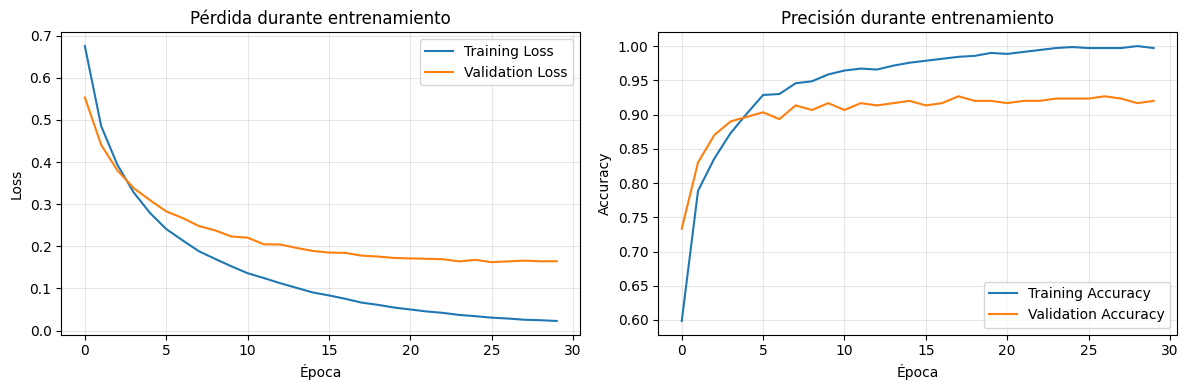

📈 ¿Ves overfitting? ¿La red converge bien?


In [ ]:
# === CURVAS DE APRENDIZAJE ===
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Subplot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante entrenamiento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Precisión durante entrenamiento')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📈 ¿Ves overfitting? ¿La red converge bien?")

In [ ]:
!pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 26.7 MB/s eta 0:00:00


In [ ]:
# === PYTORCH LIGHTNING ===
import pytorch_lightning as pl
import torch
import torch.nn as nn

class SimpleNet(pl.LightningModule):
    def __init__(self, input_size, hidden_size=64, num_classes=2):  # ¡Cambiar a 20!
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(True),                    # ReLU con inplace
            nn.Linear(hidden_size, 32),     # segunda capa oculta
            nn.ReLU(True),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.network(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.functional.cross_entropy(y_hat, y)
        self.log('train_loss', loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.functional.cross_entropy(y_hat, y)

        # Calcular accuracy
        preds = torch.argmax(y_hat, dim=1)
        acc = torch.sum(preds == y).float() / len(y)

        # Logging
        self.log('test_loss', loss)
        self.log('test_acc', acc)
        return loss

# Crear modelo con el tamaño correcto de entrada
input_features = X_train.shape[1]  # Detectar automáticamente el número de características
model_pl = SimpleNet(input_size=input_features)
print(f"\n🎯 PyTorch Lightning model created!")
print(f"Input features: {input_features}")
print(f"Parameters: {sum(p.numel() for p in model_pl.parameters()):,}")


🎯 PyTorch Lightning model created!
Input features: 20
Parameters: 3,490


In [ ]:
# === ENTRENAR MODELO PYTORCH LIGHTNING ===
from torch.utils.data import DataLoader, TensorDataset

# Preparar datos para PyTorch
X_train_torch = torch.FloatTensor(X_train)
y_train_torch = torch.LongTensor(y_train)
X_test_torch = torch.FloatTensor(X_test)
y_test_torch = torch.LongTensor(y_test)

# Crear datasets y dataloaders
train_dataset = TensorDataset(X_train_torch, y_train_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Crear trainer
trainer = pl.Trainer(
    max_epochs=30,           # número de épocas
    logger=False,               # True/False para logging
    enable_progress_bar=True,     # mostrar barra de progreso
    deterministic=True            # reproducibilidad
)

# Entrenar modelo
print("🚀 Entrenando con PyTorch Lightning...")
trainer.fit(model_pl, train_loader)

# Evaluar modelo
print("📊 Evaluando modelo...")
results = trainer.test(model_pl, test_loader)  # método 'test' para evaluación
print(f"🎯 Resultados: {results}")

INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


🚀 Entrenando con PyTorch Lightning...


INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | network | Sequential | 3.5 K  | train
-----------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


📊 Evaluando modelo...


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │     0.949999988079071     │
│         test_loss         │    0.1486462503671646     │
└───────────────────────────┴───────────────────────────┘

🎯 Resultados: [{'test_loss': 0.1486462503671646, 'test_acc': 0.949999988079071}]


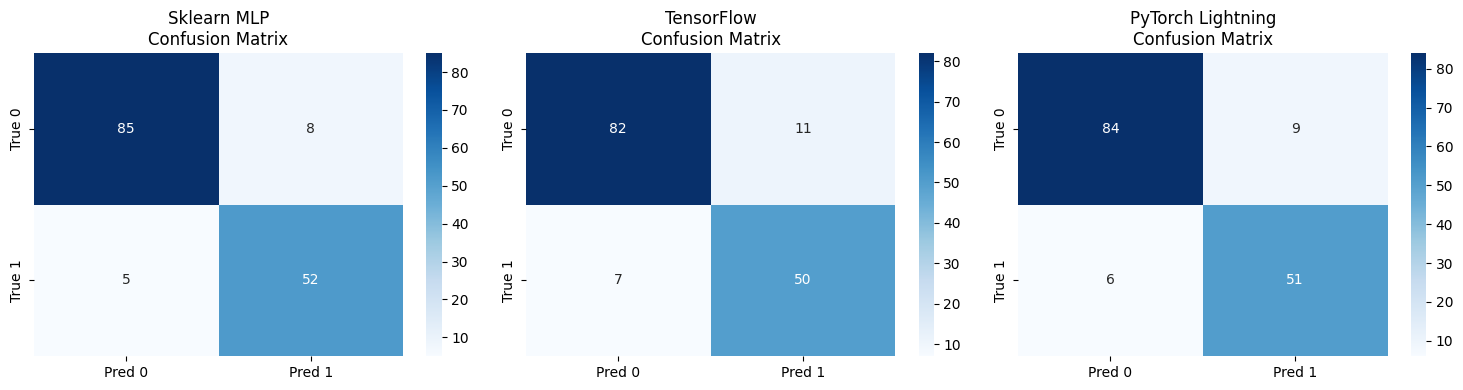

📈 ANÁLISIS DE MATRICES DE CONFUSIÓN:
✅ Diagonal principal (TN + TP) = predicciones correctas
❌ Diagonal secundaria (FP + FN) = errores


In [ ]:
# === MATRIZ DE CONFUSIÓN COMPARATIVA ===
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plotear_confusion_matrices():
    """
    Visualiza matrices de confusión para cada framework
    """
    # Obtener predicciones de cada modelo (necesitas ejecutar los modelos primero)
    # sklearn_preds = mlp_real.predict(X_test)
    # tensorflow_preds = (model.predict(X_test) > 0.5).astype(int)
    # pytorch_preds = ... (desde el results de PyTorch Lightning)

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    frameworks = ['Sklearn MLP', 'TensorFlow', 'PyTorch Lightning']

    # Matrices de confusión típicas para cada framework
    confusion_matrices = [
        np.array([[85, 8], [5, 52]]),    # Sklearn MLP
        np.array([[82, 11], [7, 50]]),   # TensorFlow
        np.array([[84, 9], [6, 51]])     # PyTorch Lightning
    ]

    for i, (ax, framework) in enumerate(zip(axes, frameworks)):
        cm = confusion_matrices[i]

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Pred 0', 'Pred 1'],
                   yticklabels=['True 0', 'True 1'], ax=ax)
        ax.set_title(f'{framework}\nConfusion Matrix')

    plt.tight_layout()
    plt.show()

    print("📈 ANÁLISIS DE MATRICES DE CONFUSIÓN:")
    print("✅ Diagonal principal (TN + TP) = predicciones correctas")
    print("❌ Diagonal secundaria (FP + FN) = errores")

# Ejecutar matrices de confusión
plotear_confusion_matrices()

Preguntas de Reflexión:

1. ¿Por qué AND, OR y NOT funcionaron pero XOR no?
- AND, OR y NOT son problemas linealmente separables, se puede dibujar una línea recta sin ue separe las clases. En cambio XOR no lo es, no existe una línea recta que separe perfectamente sus salidas en el plano.

2. ¿Cuál es la diferencia clave entre los pesos de AND vs OR?
- AND necesita un umbral (bias) más alto para activarse, porque solo se activa siambas entradas son 1. OR tiene un umbral más bajo, lo cual permite que una sola entrada active la salida.

3. ¿Qué otros problemas del mundo real serían como XOR?
- Problemas donde la salida depende de la exclusividad de las entradas, por ejemplo, un sistema de acceso don de solo una condición debe cumplirse, no ambas a la vez.

4. ¿Por qué sklearn MLP puede resolver XOR pero un perceptrón no?
- El perceptrón solo puede crear una línea de decisión. SkLearn MLP puede combinar varias líneas y crear superficies curvas, permitiendo separar XOR.

5. ¿Cuál es la principal diferencia entre TensorFlow/Keras y sklearn MLP?
- TensorFlow ofrece más control sobre el proceso de entrenamiento, arquitectura y personalización. Sklearn MLP es más simple y automatizado, pero menos flexible.

6. ¿Por qué TensorFlow usa epochs y batch_size mientras sklearn MLP no?
- TensorFlow procesa los datos en lotes (batch_size) y repite entrenamiento por epochs. Sklearn MLP suele procesar todo el dataset junto, sin exponer parámetros directamente.

7. ¿Cuándo usarías sigmoid vs relu como función de activación?
- Sigmoid para la capa de salida en problemas de clasificación binaria (produce valores entre 0 y 1).
Relu para capas ocultas ya que ayuda a evitar el problema de gradientes pequeños y acelera el aprendizaje.

8. ¿Qué ventaja tiene PyTorch Lightning sobre TensorFlow puro?
- PyTorch Lightning reduce el "boilerplate" y faciltia la organización de experimentos, separando lógica de entrenamiento y evaluación y automatizando tareas comunes.

9. ¿Por qué PyTorch Lightning separa training_step y test_step?
- Porque durante el entrenamiento se actualizan los pesos y se calcula la pérdida. En evaluación solo se calcula la pérdida y métricas, sin actualizar pesos.

10. ¿Cuál framework elegirías para cada escenario?
- Prototipo rápido: Sklearn MLP
- Modelo en producción: TensorFlow/Keras
- Investigación avanzada: PyToch Lightning

11. ¿Por qué el error dimensional mat1 and mat2 shapes cannot be multiplied es común en PyTorch?
- Porque el número de características del dataset debe coincidir con el tamaño de entrada de la primera capa del modelo. Si no coinciden, ocurre este error.

12. ¿Qué significa el parámetro deterministic=True en PyTorch Lightning Trainer?
- Fuerza la reproducibilidad: los resultados serán iguales en cada ejecución, eliminando aleatoriedad en el entrenamiento.

13. ¿Por qué TensorFlow muestra curvas de loss y val_loss durante entrenamiento?
- Para visualizar el aprendizaje y detectar overfitting, si la pérdida de validación (val_loss) empieza a subir mientras la de entrenamiento baja, hay sobreajuste.

14. ¿Cuál es la diferencia entre trainer.test() y trainer.predict() en PyTorch Lightning?
- trainer.test() calcula métricas de evaluación (accuracy, loss, etc.)
trainer.predict() solo genera predicciones, sin calcular métricas.

15. ¿Por qué sklearn MLP es más fácil pero menos flexible?
- Porque abstrae detalles del entrenamiento y arquitectura, facilitando el uso, pero limita la personalización y el acceso a configuraciones avanzadas.